

#Proyecto de Minería de Datos
###Integrantes:
1.   Andrea Castellanos
2.   Mario Espinosa
3.   Iván Torres

Entrega: Noviembre 5, 2022




>Importación de Librerías a Utilizar

In [ ]:
#---------------------------------------
# Librerías
#---------------------------------------
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy
import seaborn as sns
import sklearn
import scipy.cluster.hierarchy as sch
#---------------------------------------
from scipy.stats import norm
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, RobustScaler, StandardScaler
from sklearn.cluster import AgglomerativeClustering 
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt

>Vinculamos el Drive para cargar los datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


>Importamos **ctypes**: que es una biblioteca de funciones foráneas para Python

In [ ]:
from ctypes import LibraryLoader
LibraryLoader

ctypes.LibraryLoader

>Leemos los Datos el el archivo **.csv** que contiene los datos de una ubicación definida y lo cargamos en un Dataframe

In [ ]:
datos = pd.read_csv('/content/drive/MyDrive/Mineria de Datos/winequality-red2.csv') #Andrea
#datos = pd.read_csv('/content/drive/MyDrive/winequality-red2.csv') #Mario
#datos = pd.read_csv('/content/sample_data/winequality-red2.csv') #Ivan

>Generamos un Dataframe nuevo a partir de una copia del DataFrame Original y sobre este realizaremos los procesos y modificaciones

In [ ]:
datos2 = datos.copy()

>Listamos los registros del Dataframe Nuevo

In [ ]:
datos2.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


>Revisamos la **Información** asociada al Dataframe Nuevo para ver las características de las columnas, tipos de datos, observaciones y conteo de datos válidos **_(no nulos)_**

In [ ]:
datos2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
#---------------------------------------------
#Listamos los 10 primeros registros del Dataframe
#---------------------------------------------
datos2.head (10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


>Revisamos la existencia de Nulos en nuestro DataFrame

In [ ]:
checking_na = datos2.isnull().values.any()
print(checking_na)


False


>Procedemos a agrupar **_(clusterizar)_** nuestras observaciones en base a la variable ***quality*** que es la apreciación del catador del vino; para esto utilizamos una escala de **likert**

In [ ]:
#---------------------------------------------
#Definimos la clase "calidad_class"
#---------------------------------------------
def calidad_class(quality):
    if quality > 7:
        return 'excelente calidad'
    elif quality >= 6:
        return 'buena calidad'
    elif quality >= 4  :
        return 'media calidad'
    elif quality >= 3  :
        return 'baja calidad'        
    else:
        return 'Pésima calidad'
#---------------------------------------------
#Asignamos a cada observación la clase a la que pertenece
#---------------------------------------------        
datos2['calidad_clase'] = datos2['quality'].apply(calidad_class)

#---------------------------------------------
#Mostramos los primeros 10 registros del Dataframe para 
#ver la clasificación aplicada
#---------------------------------------------        
datos2.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,calidad_clase
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,media calidad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,media calidad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,media calidad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,buena calidad
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,media calidad
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,media calidad
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,media calidad
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,buena calidad
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,buena calidad
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,media calidad


>Creamos un gráfico de Histograma con el objetivo de identificar de forma rápida cuál es el comportamiento de nuestros datos en base al campo ***quality***

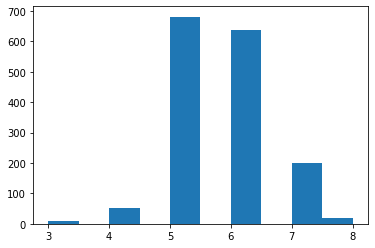

In [ ]:
#---------------------------------------------
#Asignación de parámetros y despliegue del Histograma
#--------------------------------------------- 
x = datos2['quality']
plt.hist(x,)
plt.show()

>Procedemos a graficar en base a la clasificación que aplicamos a los rangos de puntuaciones

<Figure size 576x576 with 0 Axes>

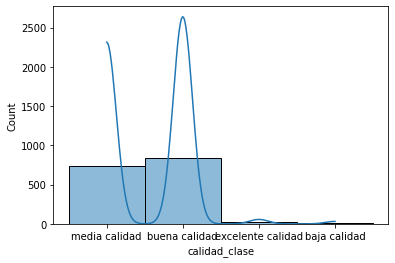

<Figure size 576x576 with 0 Axes>

In [ ]:
#Histograma
sns.histplot(x=datos2['calidad_clase'],bins=6,kde=True)
plt.figure(figsize=(8,8))


>Aplicamos el Coeficiente de Correlación de Pearson para cada variable

In [ ]:
#---------------------------------------------
#Correlación entre variables - Pearson
#---------------------------------------------
var_corre = datos2.corr( min_periods=1)
print(var_corre)

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

>Graficamos la correlación para medir el grado de covariación entre las distintas variables y mostrar su relación lineal

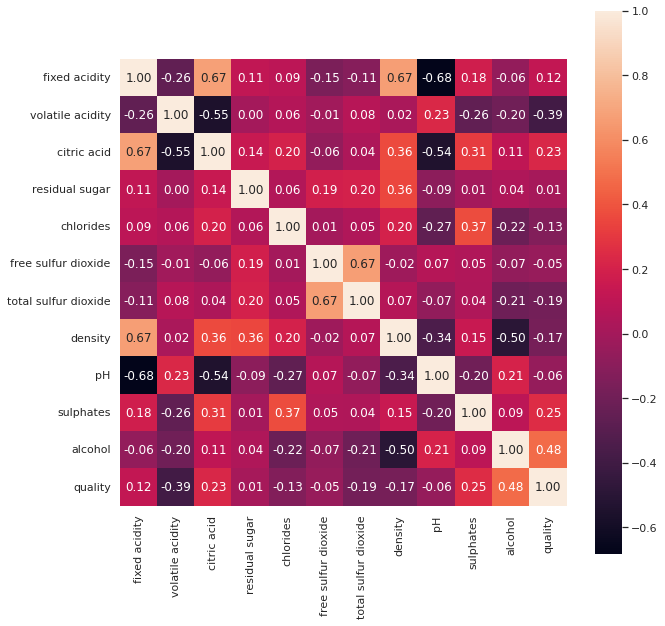

In [ ]:
#---------------------------------------------
#Mapa de calor, correlacion variable con Pearson (standard)
#---------------------------------------------
plt.figure(figsize=(10,10))
sns.set(font_scale=1)
sns.heatmap(var_corre,
            cbar=True,
            annot=True,
            square=True,
            fmt='.2f',
            annot_kws={'size': 12})

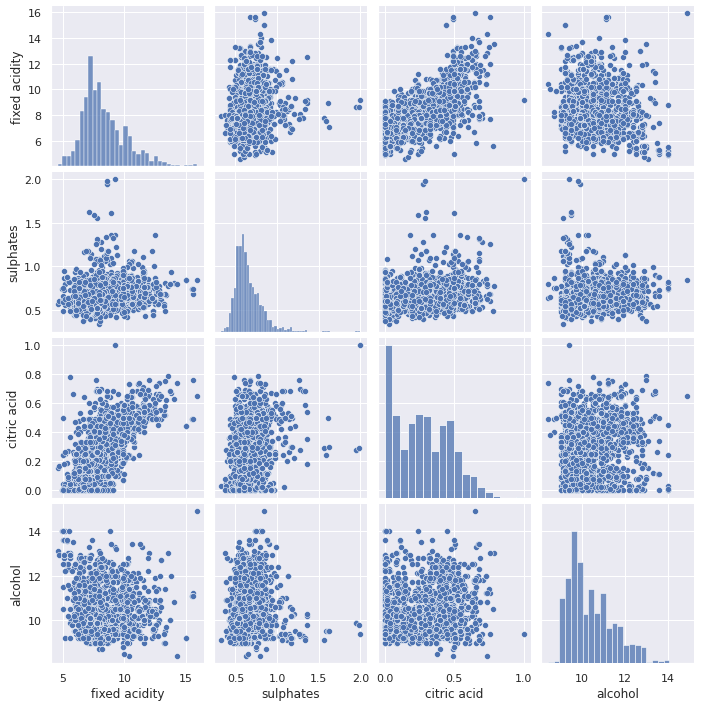

In [ ]:
#---------------------------------------------
#Generamos el comportamiento de las variables positivas
#---------------------------------------------
from sklearn.preprocessing import StandardScaler

sns.pairplot(datos2[['fixed acidity','sulphates','citric acid','alcohol']])

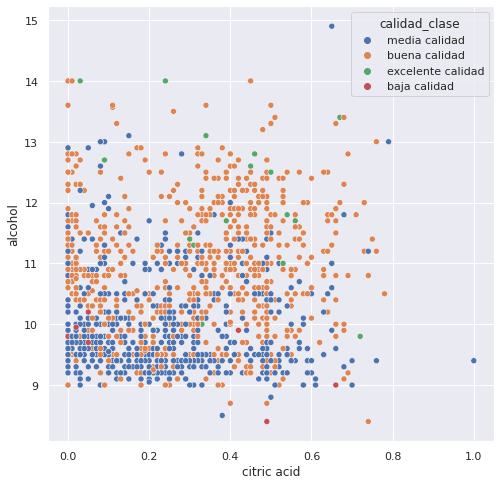

In [ ]:
#---------------------------------------------
#Grafico de Dispersión entre variable Fixed acidity y Alcohol. 
#---------------------------------------------
plt.figure(figsize=(8,8))
sns.scatterplot(data = datos2, x = 'citric acid', y = 'alcohol',hue = "calidad_clase")

#Es fácil ver que en general los vinos con alcohol entre 10 y 11, 
#y tambien con un Citric acid entre 0.2 y 0.4, se consideran vinos 
#de calidad media, y tambien vemos que si el grado de alcohol aumenta
#a más de 11 y el Citric acid se mantiene sobre 0.4 en adelante,
#los vinos se ven de buena calidad.

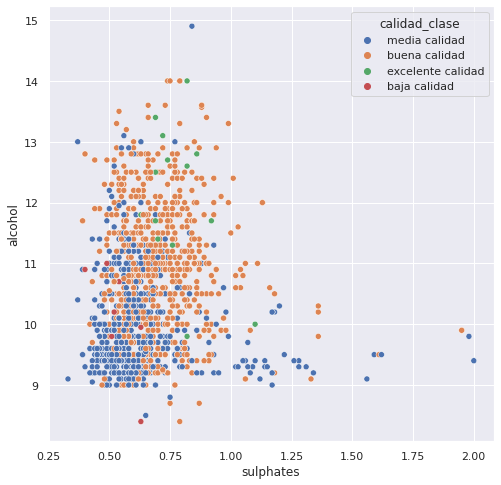

In [ ]:
#---------------------------------------------
#Grafico de Dispersión entre variable Sulphates y Alcohol. 
#---------------------------------------------
plt.figure(figsize=(8,8))
sns.scatterplot(data = datos2, x ='sulphates', y = 'alcohol',hue = "calidad_clase")

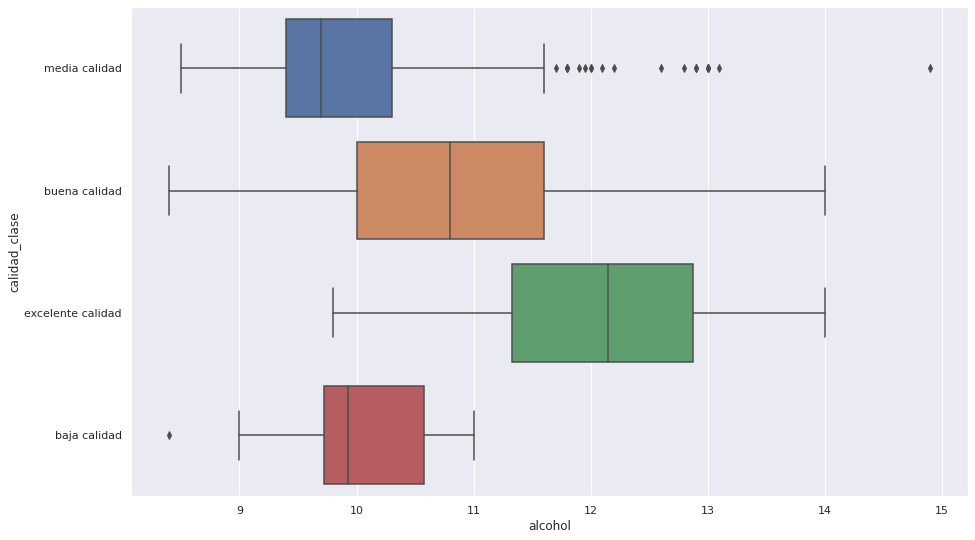

In [ ]:
#---------------------------------------------
#Grafico BoxPlot en base a la escala de calidad para el componente Alcohol. 
#---------------------------------------------
plt.figure(figsize=(15,9))
sns.boxplot(y = 'calidad_clase', x = 'alcohol', data = datos2)
plt.show()

In [ ]:
#---------------------------------------------
#Generamos el ordenamiento de todo los componentes en orden descendente 
#para validar los componente que inciden más en el resultado. 
#---------------------------------------------
datos2.corr()[['quality']].sort_values(by='quality', ascending = False)

,quality
quality,1.000000
alcohol,0.476166
sulphates,0.251397
citric acid,0.226373
fixed acidity,0.124052
residual sugar,0.013732
free sulfur dioxide,-0.050656
pH,-0.057731
chlorides,-0.128907
density,-0.174919


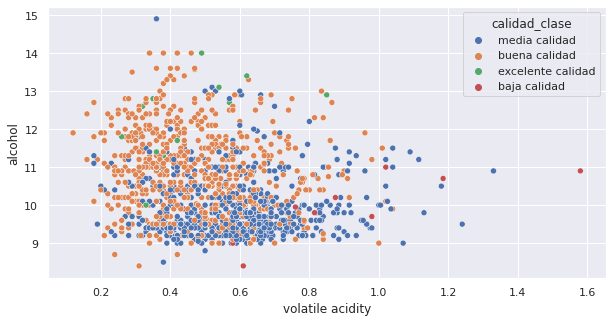

In [ ]:
#---------------------------------------------
#Relación entre acido volatil y calidad, entre mejor calidad menos acido volatil
#---------------------------------------------
plt.figure(figsize=(10,5))
sns.scatterplot(data = datos2, x ='volatile acidity', y = 'alcohol',hue = "calidad_clase")

>Aplicamos el Análisis de Componentes Principales (PCA) para identificar las variables mpas relevantes del modelo

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
#---------------------------------------------
#Generamos el conteo en base a la escala de calidad para determinar
#cual concentra el mayor peso
#---------------------------------------------
sum_total = datos2['calidad_clase'].value_counts().reset_index()
sum_total

,index,calidad_clase
0,buena calidad,837
1,media calidad,734
2,excelente calidad,18
3,baja calidad,10


In [ ]:
#---------------------------------------------
#Generamos un Dataframe con los valores que poseen un nivel de calidad de 6 en adelante
#---------------------------------------------
datos2_acp = datos2[datos2['quality'] >=6]
datos3_acp = datos2_acp[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality','calidad_clase']]
print(datos3_acp)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
3              11.2              0.28         0.56             1.9      0.075   
7               7.3              0.65         0.00             1.2      0.065   
8               7.8              0.58         0.02             2.0      0.073   
16              8.5              0.28         0.56             1.8      0.092   
19              7.9              0.32         0.51             1.8      0.341   
...             ...               ...          ...             ...        ...   
1592            6.3              0.51         0.13             2.3      0.076   
1593            6.8              0.62         0.08             1.9      0.068   
1595            5.9              0.55         0.10             2.2      0.062   
1596            6.3              0.51         0.13             2.3      0.076   
1598            6.0              0.31         0.47             3.6      0.067   

      free sulfur dioxide  

In [ ]:
#---------------------------------------------
#Mostramos los valores únicos de cantidad residentes en el nuevo dataframe
#---------------------------------------------
print(datos3_acp['quality'].unique())

[6 7 8]


In [ ]:
#---------------------------------------------
#Aplicamos el método "describe" para visualizar algunas métricas asociadas al conjunto de datos
#---------------------------------------------
datos3_acp.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000
mean,8.474035,0.474146,0.299883,2.535965,0.082661,15.272515,39.352047,0.996467,3.310643,0.692620,10.855029,6.274854
std,1.862795,0.161999,0.199889,1.424835,0.037258,10.038538,27.253280,0.002067,0.154554,0.155558,1.106109,0.491627
min,4.700000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.860000,0.390000,8.400000,6.000000
25%,7.100000,0.350000,0.115000,1.900000,0.067000,7.000000,20.000000,0.995185,3.210000,0.590000,10.000000,6.000000
50%,8.000000,0.460000,0.310000,2.200000,0.077000,13.000000,33.000000,0.996400,3.310000,0.660000,10.800000,6.000000
75%,9.650000,0.580000,0.460000,2.600000,0.087500,20.500000,50.000000,0.997685,3.400000,0.770000,11.700000,7.000000
max,15.600000,1.040000,0.780000,15.400000,0.415000,72.000000,289.000000,1.003690,4.010000,1.950000,14.000000,8.000000


>Generamos un mapa de calos únicamente con las variables cuyo valor es > 6 

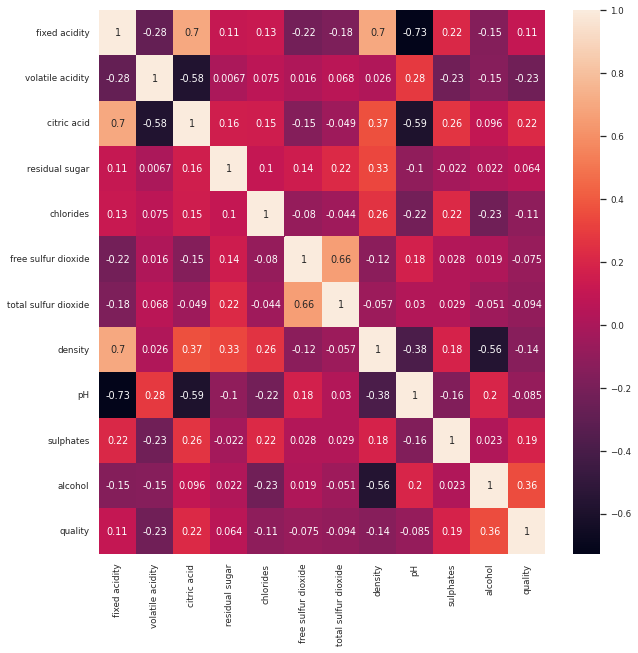

In [ ]:
#---------------------------------------------
#Hotmap con quality >=6
#---------------------------------------------
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(datos3_acp.corr(),annot = True)

In [ ]:
#---------------------------------------------
#Realizamos la evaluación de los componentes 
#clasificados como Media Cal1dad y Baja Calidad
#---------------------------------------------
datos4_acp = datos2[datos2['quality'] <=5]
datos5_acp = datos4_acp[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality','calidad_clase']]
print(datos5_acp)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
4               7.4             0.700         0.00             1.9      0.076   
5               7.4             0.660         0.00             1.8      0.075   
...             ...               ...          ...             ...        ...   
1582            6.1             0.715         0.10             2.6      0.053   
1583            6.2             0.460         0.29             2.1      0.074   
1589            6.6             0.725         0.20             7.8      0.073   
1594            6.2             0.600         0.08             2.0      0.090   
1597            5.9             0.645         0.12             2.0      0.075   

      free sulfur dioxide  

>Generamos un Mapa de Calor de las evaluaciones menor o igual a 5

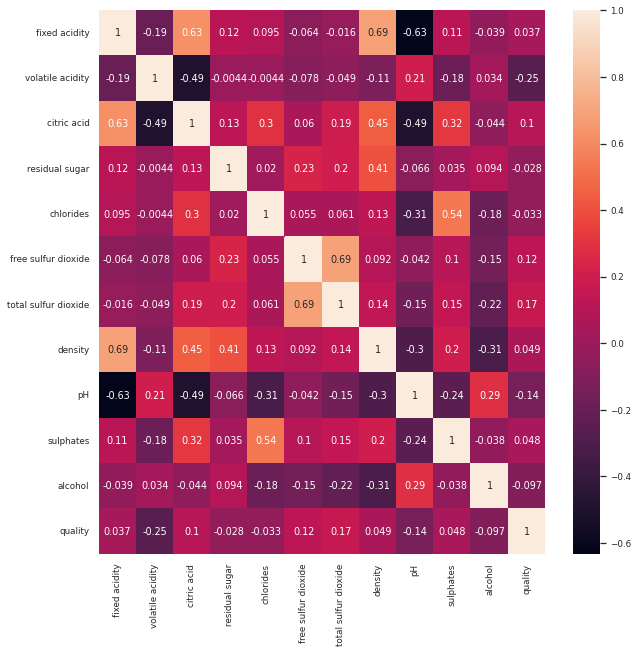

In [ ]:
#Mapa de Calor  
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(datos5_acp.corr(),annot = True)

In [ ]:
#---------------------------------------------
#Almacenamos todos los componentes en un nuevo DataFrame
#---------------------------------------------
datos3f = datos2[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']]
datos3f


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


>Procedemos con la aplicacion del Scaler de los datos

In [ ]:
#---------------------------------------------
#Creamos el objeto scaler
#---------------------------------------------
scaler = StandardScaler()

In [ ]:
#---------------------------------------------
#Procedemos a Ajustar y Transformar los datos
#Se hace el nuevo dataset con las variables fisioquímicas 
#---------------------------------------------
datos_scale = scaler.fit_transform(datos3f[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']]) 

In [ ]:
#---------------------------------------------
#Realizamos la reducción de la dimensión Sulfur
#---------------------------------------------
datos_scale1 = scaler.fit_transform(datos3f[['fixed acidity','citric acid','residual sugar','chlorides','density','sulphates']]) 

>Establecemos la utilización de un PCA sobre aquellos componentes que lleguen al 80% de var.

In [ ]:
#---------------------------------------------
#PCA de 80%
#---------------------------------------------
pca = PCA(0.80)

In [ ]:
#---------------------------------------------
#Realizamos un nuevo PCA
#---------------------------------------------
pca_redwine = pca.fit(datos_scale1)
pca_redwine = pca.transform(datos_scale1)

In [ ]:
#---------------------------------------------
#Revisamos el comportamiento de las variables
#Los valores Negativos son números poco influyentes. (Escala de -1 a 1)
#---------------------------------------------
pca.components_[0]

array([0.53863695, 0.50185388, 0.227431  , 0.26098302, 0.49994558,
       0.29703592])

In [ ]:
#---------------------------------------------
#Mostramos los valores del nuevo PCA
#Podemos también revisar cómo está representada cada observación en las nuevas dimensiones de los nuevos PCA
#---------------------------------------------
pca_redwine

array([[-1.04252728, -0.40190414,  0.23934462,  0.90312772],
       [-0.73839089,  0.21979687,  0.68481641,  0.42545103],
       [-0.71658893,  0.09156888,  0.41056461,  0.50832008],
       ...,
       [-1.19618208,  0.64634817,  0.39268381, -0.49188498],
       [-1.54135196,  0.65993835,  0.2890265 , -0.35944758],
       [-0.47698934, -0.02781459,  0.48923056, -1.23548278]])

In [ ]:
#---------------------------------------------
#Transferimos los Datos a un Dataframe con los Nuevos Componentes Principales
#---------------------------------------------
principalDf1 = pd.DataFrame(data = pca_redwine)
principalDf1.head()
#---------------------------------------------

,0,1,2,3
0,-1.042527,-0.401904,0.239345,0.903128
1,-0.738391,0.219797,0.684816,0.425451
2,-0.716589,0.091569,0.410565,0.508320
3,1.659084,-0.786997,-1.470560,0.272645
4,-1.042527,-0.401904,0.239345,0.903128


In [ ]:
#---------------------------------------------
#Generamos la Varianza de los datos del PCA
#---------------------------------------------
pca.explained_variance_

array([2.442206  , 1.2293042 , 0.97600102, 0.6490984 ])

In [ ]:
#---------------------------------------------
#Generamos la Variznza Porcentual de los datos del PCA
#---------------------------------------------
pca.explained_variance_ratio_

array([0.40677978, 0.2047559 , 0.16256511, 0.10811541])

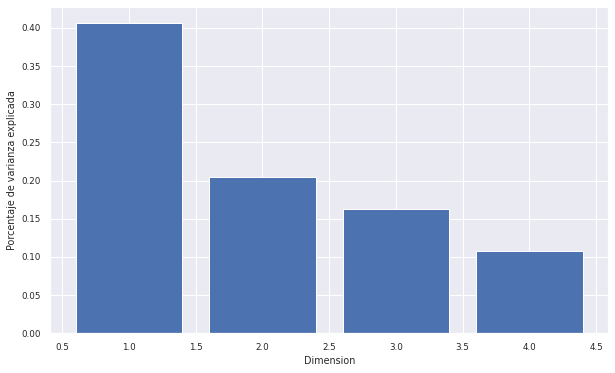

In [ ]:
#---------------------------------------------
#Graficamos la Varianza de los Nuevos Componentes Principales
#---------------------------------------------
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(np.array([1,2,3,4]),pca.explained_variance_ratio_)
ax.set(xlabel = "Dimension",
       ylabel = "Porcentaje de varianza explicada")
plt.show()

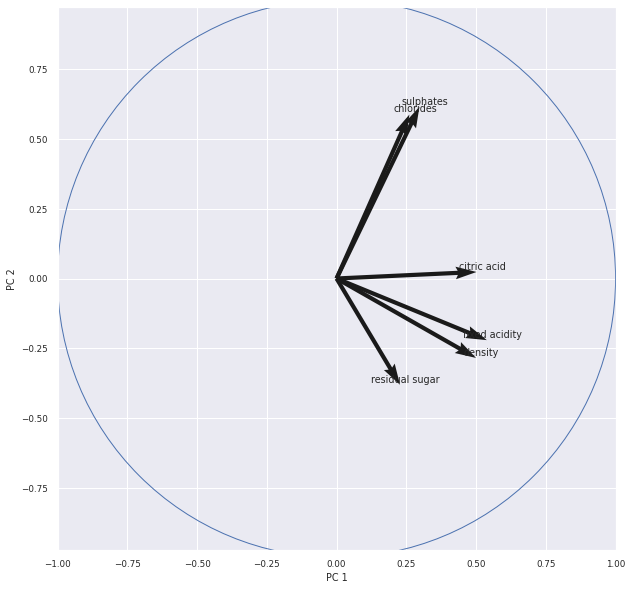

In [ ]:
#---------------------------------------------
#Generamos la visualización de la relación que existe 
#entre los componentes
#---------------------------------------------
PCs = pca.components_

#---------------------------------------------
#Utilizamos quiver para generar el dibujo básico
#---------------------------------------------
fig = plt.figure(figsize=(10,10))
plt.quiver(np.zeros(PCs.shape[1]), np.zeros(PCs.shape[1]),
           PCs[0,:], PCs[1,:], 
           angles='xy', scale_units='xy', scale=1)

#---------------------------------------------
#Agregamos las etiquetas basadas en los nombres de las características
# y asignamos los datos
#--------------------------------------------
feature_names = np.array(['fixed acidity','citric acid','residual sugar','chlorides','density','sulphates'])

for i,j,z in zip(PCs[1,:]+0.02, PCs[0,:]+0.02, feature_names):
    plt.text(j, i, z, ha='center', va='center')

#---------------------------------------------
#Agregamos la medida circular
#---------------------------------------------
circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
plt.gca().add_artist(circle)

#---------------------------------------------
#Aseguramos el aspecto correcto en los ratios y los limites de los ejes
#---------------------------------------------
plt.axis('equal')
plt.xlim([-1.0,1.0])
plt.ylim([-1.0,1.0])

#---------------------------------------------
#Etiquetas de los Ejes
#---------------------------------------------
plt.xlabel('PC 1')
plt.ylabel('PC 2')

#---------------------------------------------
#Mostramos el Gráfico
#---------------------------------------------
plt.show()

In [ ]:
#---------------------------------------------
#Asignamos a un DataFrame los Componentes Principales
#---------------------------------------------
df = principalDf1
df.columns = ['PC1','PC2','PC3','PC4']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


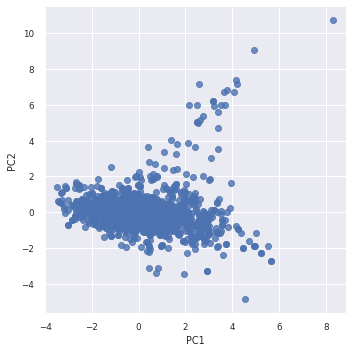

In [ ]:
#---------------------------------------------
#Realizamos la comparación entre los Componentes Principales 1 y 2
#---------------------------------------------
g = sns.lmplot('PC1',
               'PC2',
               data=df,
               fit_reg=False,
               scatter=True)
               #size=7)

plt.show()

#---------------------------------------------
#La gráfica no muestra diferencias sobre posibles Clusters a generar
#---------------------------------------------

**CLUSTERING DE VARIABLES **

>Aplicación del Método Elbow Code para K-means

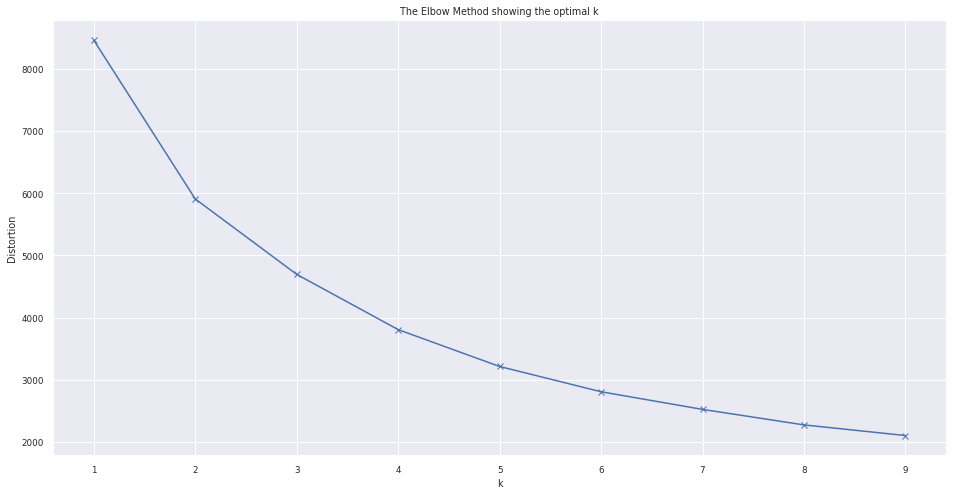

In [ ]:
#---------------------------------------------
#Generamos el Elbow Code
#---------------------------------------------
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(principalDf1)
    distortions.append(kmeanModel.inertia_)
#---------------------------------------------
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

>Aplicamos el método K-Means

In [ ]:
#---------------------------------------------
#Aplicamos el método scaler con la transformación ajustada al Dataframe
#---------------------------------------------
km_scale = scaler.fit_transform(principalDf1)
km_scale[0:5]


array([[-0.6673169 , -0.3626007 ,  0.24234517,  1.12132046],
       [-0.4726406 ,  0.19830226,  0.69340164,  0.52823862],
       [-0.45868527,  0.08261408,  0.41571168,  0.63112857],
       [ 1.06197208, -0.71003384, -1.48899568,  0.33851455],
       [-0.6673169 , -0.3626007 ,  0.24234517,  1.12132046]])

In [ ]:
#---------------------------------------------
#Códificación del K-Means
#---------------------------------------------
kmeans2 = KMeans(
        init="random",
        n_clusters=6,
        random_state=0
    )

In [ ]:
kmeans2.fit(km_scale)

KMeans(init='random', n_clusters=6, random_state=0)

In [ ]:
#---------------------------------------------
#Mostramos las conclusiones relacionados a los 
#resultados del K-Means aplicado
#---------------------------------------------
print('La suma de distancias cuadradas de cada punto a su centroide en esta solución es de')
print(kmeans2.inertia_)
print('Pero este número por si solo no es muy explicativo')

La suma de distancias cuadradas de cada punto a su centroide en esta solución es de
2333.210860872613
Pero este número por si solo no es muy explicativo


In [ ]:
#---------------------------------------------
#Generamos los Centroides del Dataframe sobre los Componentes Principales
#---------------------------------------------
centroides = pd.DataFrame(kmeans2.cluster_centers_)
centroides.columns = ['PC1','PC2','PC3','PC4']
centroides

,PC1,PC2,PC3,PC4
0,0.811275,-1.290131,2.830996,-1.359854
1,-1.144478,0.360566,0.008463,-0.578052
2,1.204099,-0.537881,-0.730899,0.278506
3,2.175975,5.367507,1.983706,2.302426
4,0.296669,0.605726,-0.548204,-1.120215
5,-0.436777,-0.163255,0.150510,0.590794


In [ ]:
#---------------------------------------------
#Mostramos el Dataframe con los clusters
#---------------------------------------------
from sklearn.cluster import KMeans
datos2['Clusters'] = kmeans2.labels_
datos2

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,calidad_clase,Clusters
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,media calidad,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,media calidad,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,media calidad,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,buena calidad,2
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,media calidad,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,media calidad,1
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,buena calidad,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,buena calidad,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,media calidad,1


In [ ]:
print(datos2['Clusters'].unique())

[5 2 0 1 4 3]


Text(0.5, 1.0, 'Fixed Acidity Según Cluster')

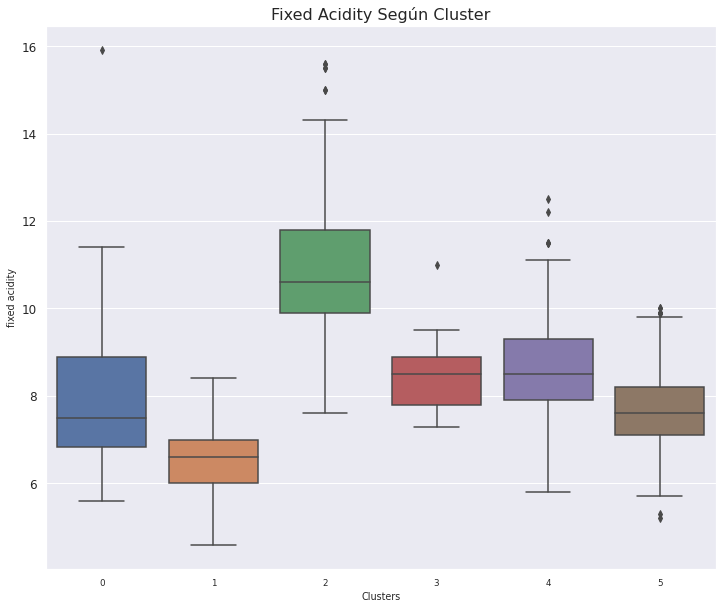

In [ ]:
#---------------------------------------------
#Generamos un BoxPlot sobre la variable "fixed acidity" que tenia el mayor % en el Dataset de PCA 
#basada em los clusters generados
#---------------------------------------------
plt.figure(figsize=(12,10))
sns.boxplot(y=datos2['fixed acidity'],x=datos2['Clusters'])
plt.yticks(fontsize=12)
plt.title('Fixed Acidity Según Cluster', fontsize=16)

In [ ]:
#---------------------------------------------
#Generamos la Mediana de los Clusters
#---------------------------------------------
datos2.groupby('Clusters')['fixed acidity','citric acid','residual sugar','chlorides','density','sulphates'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


,fixed acidity,citric acid,residual sugar,chlorides,density,sulphates
Clusters,,,,,,
0,8.089744,0.317949,7.451282,0.090859,0.998205,0.669359
1,6.497046,0.127131,2.054008,0.066173,0.994366,0.645063
2,10.848525,0.493279,2.588361,0.088449,0.998715,0.657148
3,8.441667,0.541667,1.987500,0.399667,0.997080,1.190417
4,8.647426,0.404081,2.205331,0.077603,0.996081,0.831471
5,7.714202,0.153734,2.276061,0.086987,0.996780,0.574129


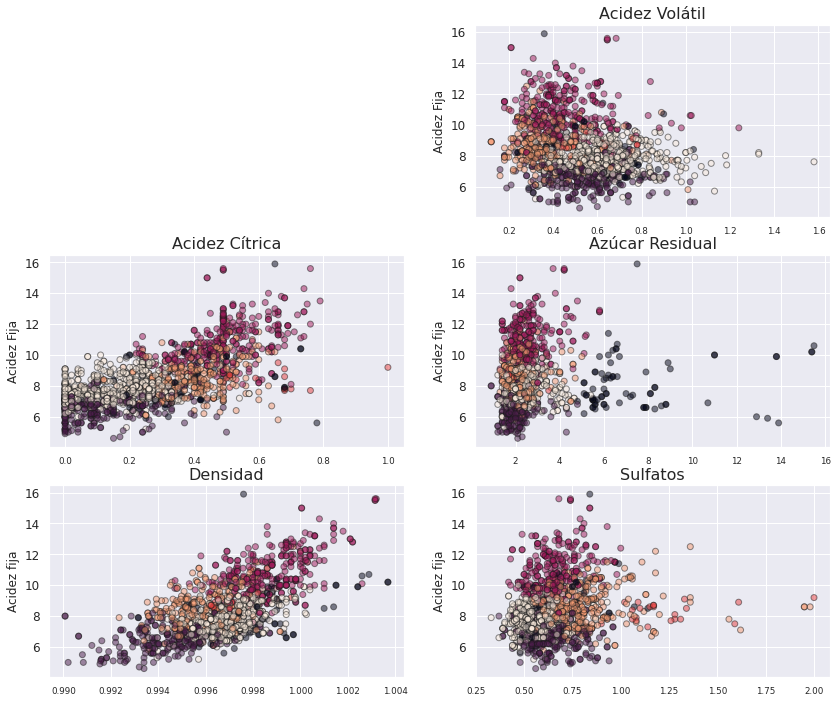

In [ ]:
#---------------------------------------------
#Presentamos la Relación de los componentes:
#Acidez fija vs Acidez Volátil por cluster
#---------------------------------------------
plt.figure(figsize=(14,12))
var=datos2['fixed acidity']

#---------------------------------------------
#Presentamos la Relación de los componentes:
#Acidez fija vs Acidez Volátil por cluster
#---------------------------------------------
plt.subplot(322)
plt.scatter(y=var, x=datos2['volatile acidity'],c=datos2['Clusters'],alpha=0.5, edgecolor='k')
plt.yticks(fontsize=12)
plt.ylabel('Acidez Fija', fontsize=12)
plt.title('Acidez Volátil', fontsize=16)

#---------------------------------------------
#Presentamos la Relación de los componentes:
#Acidez fija vs Acidez Cítrica por cluster
#---------------------------------------------
plt.subplot(323)
plt.scatter(y=var, x=datos2['citric acid'],c=datos2['Clusters'],alpha=0.5, edgecolor='k')
plt.yticks(fontsize=12)
plt.ylabel('Acidez Fija', fontsize=12)
plt.title('Acidez Cítrica', fontsize=16)

#---------------------------------------------
#Presentamos la Relación de los componentes:
#Acidez fija vs Azúcar Residual por cluster
#---------------------------------------------
plt.subplot(324)
plt.scatter(y=var, x=datos2['residual sugar'],c=datos2['Clusters'],alpha=0.5, edgecolor='k')
plt.yticks(fontsize=12)
plt.ylabel('Acidez fija', fontsize=12)
plt.title('Azúcar Residual', fontsize=16)

#---------------------------------------------
#Presentamos la Relación de los componentes:
#Acidez fija vs Densidad por cluster
#---------------------------------------------
plt.subplot(325)
plt.scatter(y=var, x=datos2['density'],c=datos2['Clusters'],alpha=0.5, edgecolor='k')
plt.yticks(fontsize=12)
plt.ylabel('Acidez fija', fontsize=12)
plt.title('Densidad', fontsize=16)

#---------------------------------------------
#Presentamos la Relación de los componentes:
#Acidez fija vs Sulfatos por cluster
#---------------------------------------------
plt.subplot(326)
plt.scatter(y=var, x=datos2['sulphates'],c=datos2['Clusters'],alpha=0.5, edgecolor='k')
plt.yticks(fontsize=12)
plt.ylabel('Acidez fija', fontsize=12)
plt.title('Sulfatos', fontsize=16)

#---------------------------------------------
#Mostramos los gráficos
#---------------------------------------------
plt.show()

### Agrupamiento Jerárquico
Utilizando el método WARD para minimizar la varianza dentro de los clusters

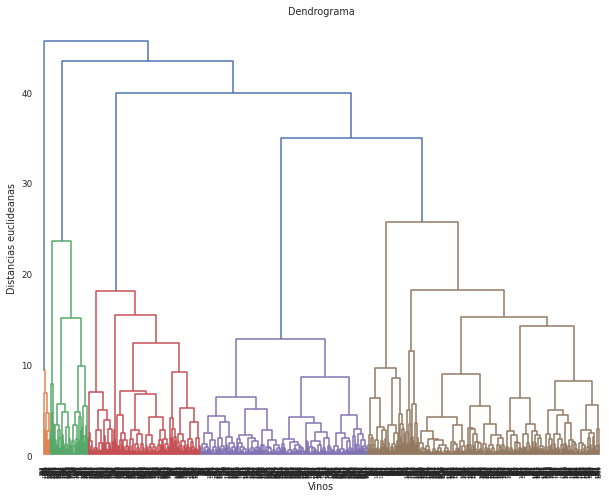

In [ ]:
#---------------------------------------------
#Mostramos el análisis clusterización por medio de un Dendograma
#---------------------------------------------
plt.figure(figsize=(10,8))
dendrogram = sch.dendrogram(sch.linkage(km_scale, method  = "ward"))
plt.title('Dendrograma')
plt.xlabel('Vinos')
plt.ylabel('Distancias euclideanas')
plt.show()

Tomando en cuenta las ramificaciones en el gráfico; utilizaremos el agrupamiento de 5 clusters

Utilizamos la función **AgglomerativeClustering**

In [ ]:
jer = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage ='ward')

Guardamos el cluster asignado a cada observación

In [ ]:
datos2['Clusters_j']= jer.fit_predict(km_scale)
datos2

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,calidad_clase,Clusters,Clusters_j
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,media calidad,5,4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,media calidad,5,4
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,media calidad,5,4
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,buena calidad,2,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,media calidad,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,media calidad,1,4
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,buena calidad,1,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,buena calidad,1,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,media calidad,1,1


Comparamos los resultados del k-means vs el Jerárquico

Comportamiento de los cluster jerárquicos vs las variables observadas

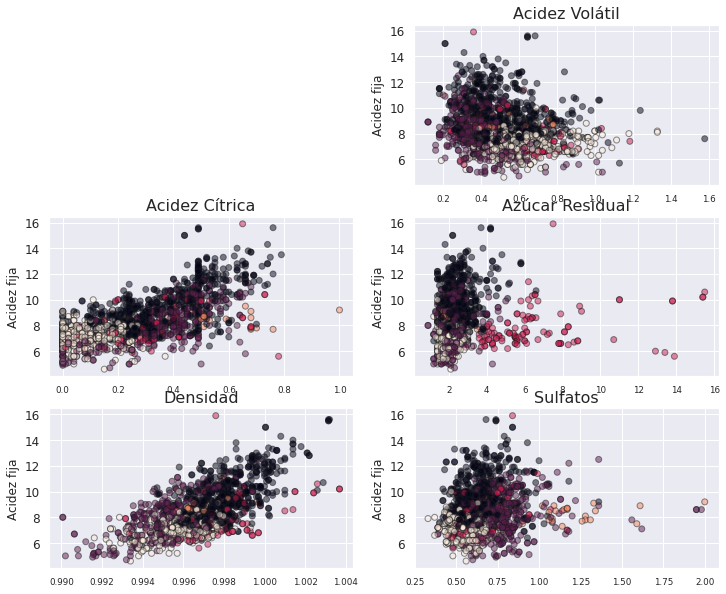

In [ ]:
#---------------------------------------------
#Generamos la relación entre:
#Acidez fija vs Acidez Volátil por cluster
#---------------------------------------------
plt.figure(figsize=(12,10))
var=datos2['fixed acidity']


#---------------------------------------------
#Generamos la relación entre:
#Acidez fija vs Acidez Volátil por cluster
#---------------------------------------------
plt.subplot(322)
plt.scatter(y=var, x=datos2['volatile acidity'],c=datos2['Clusters_j'],alpha=0.5, edgecolor='k')
plt.yticks(fontsize=12)
plt.ylabel('Acidez fija', fontsize=12)
plt.title('Acidez Volátil', fontsize=16)

#---------------------------------------------
#Generamos la relación entre:
#Acidez fija vs Acidez Cítrica por cluster
#---------------------------------------------
plt.subplot(323)
plt.scatter(y=var, x=datos2['citric acid'],c=datos2['Clusters_j'],alpha=0.5, edgecolor='k')
plt.yticks(fontsize=12)
plt.ylabel('Acidez fija', fontsize=12)
plt.title('Acidez Cítrica', fontsize=16)

#---------------------------------------------
#Generamos la relación entre:
#Acidez fija vs Azúcar Residual por cluster
#---------------------------------------------
plt.subplot(324)
plt.scatter(y=var, x=datos2['residual sugar'],c=datos2['Clusters_j'],alpha=0.5, edgecolor='k')
plt.yticks(fontsize=12)
plt.ylabel('Acidez fija', fontsize=12)
plt.title('Azúcar Residual', fontsize=16)

#---------------------------------------------
#Generamos la relación entre:
#Acidez fija vs Densidad por cluster
#---------------------------------------------
plt.subplot(325)
plt.scatter(y=var, x=datos2['density'],c=datos2['Clusters_j'],alpha=0.5, edgecolor='k')
plt.yticks(fontsize=12)
plt.ylabel('Acidez fija', fontsize=12)
plt.title('Densidad', fontsize=16)

#---------------------------------------------
#Generamos la relación entre:
#Acidez fija vs Sulfatos por cluster
#---------------------------------------------
plt.subplot(326)
plt.scatter(y=var, x=datos2['sulphates'],c=datos2['Clusters_j'],alpha=0.5, edgecolor='k')
plt.yticks(fontsize=12)
plt.ylabel('Acidez fija', fontsize=12)
plt.title('Sulfatos', fontsize=16)

#---------------------------------------------
#Mostramos los Gráficos
#---------------------------------------------
plt.show()

In [ ]:
#---------------------------------------------
#Generamos la media de la agrupación por Clusters de la características
#---------------------------------------------
datos2.groupby('Clusters_j')['fixed acidity','citric acid','residual sugar','chlorides','density','sulphates'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


,fixed acidity,citric acid,residual sugar,chlorides,density,sulphates
Clusters_j,,,,,,
0,9.384962,0.358947,2.431203,0.091236,0.997888,0.642316
1,8.053727,0.348385,2.196273,0.068183,0.995305,0.787888
2,7.758716,0.253945,6.485321,0.089138,0.997678,0.646422
3,8.441667,0.541667,1.987500,0.399667,0.997080,1.190417
4,7.140919,0.087119,2.048017,0.079173,0.995903,0.568914


In [ ]:
datos2['Clusters_j'].value_counts()

0    665
4    479
1    322
2    109
3     24
Name: Clusters_j, dtype: int64

Revizamos cómo se comportan los clusters con respecto a las variables observadas

Text(0.5, 1.0, 'Acidez Fija según cluster jerárquico')

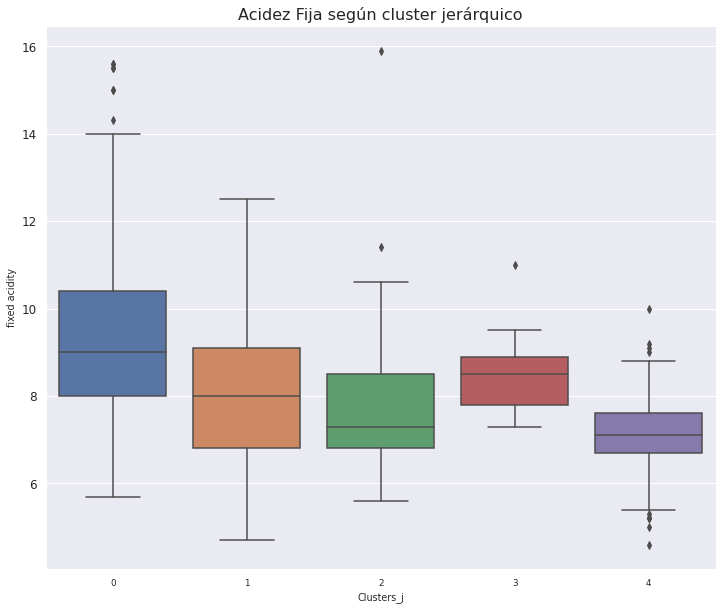

In [ ]:
plt.figure(figsize=(12,10))
sns.boxplot(y=datos2['fixed acidity'],x=datos2['Clusters_j'])
plt.yticks(fontsize=12)
plt.title('Acidez Fija según cluster jerárquico', fontsize=16)

>Aplicación de DBSCAN

In [ ]:
#---------------------------------------------
#Generamos el DBSCAN
#---------------------------------------------
m = DBSCAN(eps=0.80, min_samples=10)
m.fit(km_scale)

DBSCAN(eps=0.8, min_samples=10)

In [ ]:
#---------------------------------------------
#Asignamos a la columna Cluster_db el valor del conteo. DBSCAN
#---------------------------------------------
datos2['Clusters_db'] = m.labels_

In [ ]:
#---------------------------------------------
#Mostramos el valor de los conteos. DBSCAN
#---------------------------------------------
datos2.Clusters_db.value_counts()

 0    1418
-1     167
 1      14
Name: Clusters_db, dtype: int64

In [ ]:
#---------------------------------------------
#Mostramos nuestra Escala K-Means DBSCAN
#---------------------------------------------
km_scale

array([[-0.6673169 , -0.3626007 ,  0.24234517,  1.12132046],
       [-0.4726406 ,  0.19830226,  0.69340164,  0.52823862],
       [-0.45868527,  0.08261408,  0.41571168,  0.63112857],
       ...,
       [-0.76567063,  0.58313981,  0.39760671, -0.61072281],
       [-0.98661228,  0.59540096,  0.29264989, -0.44628896],
       [-0.30531867, -0.02509451,  0.49536382, -1.53397143]])

Text(0, 0.5, 'volatile acidity')

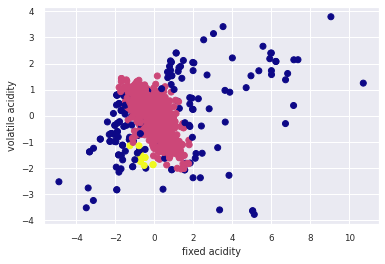

In [ ]:
#---------------------------------------------
#Ejecutamos DBSCAN
#---------------------------------------------
dbscan = DBSCAN(eps=0.80, min_samples = 10, metric = "euclidean").fit(km_scale)
clusters = dbscan.fit_predict(km_scale)
df_values = df.values

#---------------------------------------------
#Graficación de los clústers. DBSCAN
#---------------------------------------------
plt.scatter(df_values[:, 1], df_values[:, 3], c=clusters, cmap="plasma")
plt.xlabel("fixed acidity")
plt.ylabel("volatile acidity")

En este caso particular DBSCAN no parece ser una buena solución.

  # CONCLUSIONES FINALES

In [ ]:
#1era. Conclusión - PCA
##Los siguientes serían los componentes principales que afectan las variables del vino:

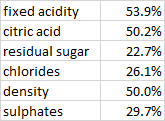

In [ ]:
#2da. Conclusión - Clusterización

## Al utilizar tres metodos diferentes, encontramos que 
##  a. El metodo de k-means nos arroja 6 posibles clusters 
##  b. El metodo jerarquico mediante Dendrograma nos arroja 5 clusters
##  c. El metodo DBSCAN no sirve para este analisis 

## El que nos parecio adecuado para el analisis fue el del metodo jerarquico, sin embargo ya que queremos ver las variables que impactan la calificación del
## catador, decidimos comparar la calificacion contra los clusters para validar si habian diferencias significativas entre las variables fisioquimicas y
## la calificacion final hecha por el catador de Vinos 

In [ ]:
#---------------------------------------------
#Generamos una Tabla Cruzada de los Componentes Principales
#---------------------------------------------
pd.crosstab(datos2['Clusters'],datos2['Clusters_j'])

Clusters_j,0,1,2,3,4
Clusters,,,,,
0,1,0,77,0,0
1,16,97,6,0,118
2,282,23,0,0,0
3,0,0,0,24,0
4,68,202,2,0,0
5,298,0,24,0,361


In [ ]:
#---------------------------------------------
#Generamos una Tabla Cruzada utilizando los clusters de:
#Componentes Principales y Calidad
#---------------------------------------------
pd.crosstab(datos2['calidad_clase'],datos2['Clusters'])

Clusters,0,1,2,3,4,5
calidad_clase,,,,,,
baja calidad,1,0,3,0,0,6
buena calidad,38,165,172,7,212,243
excelente calidad,1,5,4,0,8,0
media calidad,38,67,126,17,52,434


In [ ]:
#---------------------------------------------
#Generamos una Tabla Cruzada utilizando los clusters de:
#Componentes Principales y Calidad
#---------------------------------------------
pd.crosstab(datos2['calidad_clase'],datos2['Clusters_j'])

Clusters_j,0,1,2,3,4
calidad_clase,,,,,
baja calidad,6,0,2,0,2
buena calidad,328,259,46,7,197
excelente calidad,2,15,1,0,0
media calidad,329,48,60,17,280


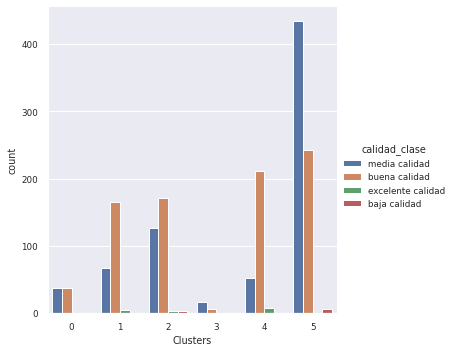

In [ ]:
#---------------------------------------------
#Graficamos la comparativa entre ambos esquemas de clusters
#---------------------------------------------
sns.catplot(data=datos2, x="Clusters", hue="calidad_clase", kind="count")

In [ ]:
##Se concluye que para realizar un vino que tenga buena aceptación de Calidad requiere que sus variables estén cercanos a los siguientes números por variable 

In [ ]:
datos2.groupby('calidad_clase')['fixed acidity','citric acid','residual sugar','chlorides','density','sulphates'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,fixed acidity,citric acid,residual sugar,chlorides,density,sulphates
calidad_clase,,,,,,
baja calidad,8.360000,0.171000,2.635000,0.122500,0.997464,0.570000
buena calidad,8.472043,0.297921,2.535066,0.082967,0.996494,0.691004
excelente calidad,8.566667,0.391111,2.577778,0.068444,0.995212,0.767778
media calidad,8.139237,0.238665,2.540804,0.092587,0.997063,0.619196
